In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


In [2]:
# Function to fetch historical price data from Yahoo Finance
def fetch_stock_data(ticker_symbol, start_date, end_date):

    stock_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    return stock_data


In [3]:
# Define Parameters
ticker_symbol = 'NVDA'
start_date = (dt.datetime.now() - dt.timedelta(days=2*365)).strftime('%Y-%m-%d')
end_date = (dt.datetime.now() - dt.timedelta(days=1)).strftime('%Y-%m-%d')


In [4]:

# Fetch historical price data
stock_data = fetch_stock_data(ticker_symbol, start_date, end_date)
stock_data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-23,162.740005,169.149994,161.789993,168.979996,168.768112,63988900
2022-05-24,165.100006,165.970001,157.800003,161.539993,161.337418,58855000
2022-05-25,160.199997,171.110001,160.000000,169.750000,169.537155,78113200
2022-05-26,160.360001,180.919998,160.220001,178.509995,178.286148,99657500
2022-05-27,181.860001,188.809998,181.000000,188.110001,187.874100,73837900
...,...,...,...,...,...,...
2024-05-13,904.780029,909.979980,885.289978,903.989990,903.989990,28968000
2024-05-14,895.989990,916.510010,889.340027,913.559998,913.559998,29650700
2024-05-15,924.719971,948.619995,915.989990,946.299988,946.299988,41773500


In [5]:
#displays a summary of the DataFrame
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 500 entries, 2022-05-23 to 2024-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       500 non-null    float64
 1   High       500 non-null    float64
 2   Low        500 non-null    float64
 3   Close      500 non-null    float64
 4   Adj Close  500 non-null    float64
 5   Volume     500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.3 KB


In [6]:
# Retrieve data in 'Close' column  and reshape to 2D array
train_data = stock_data['Close'].values.reshape(-1, 1)


In [7]:
# Scale the training data
sc = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = sc.fit_transform(train_data)


In [9]:
# Prepare training data with timesteps
x_train = []
y_train = []
for i in range(60, len(train_data_scaled)):
    x_train.append(train_data_scaled[i-60:i, 0])
    y_train.append(train_data_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [10]:
# Reshape x_train to be 3-dimensional => LSTM  expect 3D which are (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [11]:

# Build the LSTM model
from keras.layers import Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [29]:
# Train the model with validation split
hist = model.fit(x_train, y_train, epochs=80, batch_size=32, validation_split=0.2, verbose=2)


Epoch 1/80
11/11 - 2s - 153ms/step - loss: 0.0013 - val_loss: 0.0333
Epoch 2/80
11/11 - 2s - 141ms/step - loss: 0.0012 - val_loss: 0.0300
Epoch 3/80
11/11 - 2s - 141ms/step - loss: 0.0010 - val_loss: 0.0346
Epoch 4/80
11/11 - 2s - 150ms/step - loss: 0.0013 - val_loss: 0.0258
Epoch 5/80
11/11 - 2s - 166ms/step - loss: 0.0014 - val_loss: 0.0294
Epoch 6/80
11/11 - 2s - 226ms/step - loss: 0.0011 - val_loss: 0.0406
Epoch 7/80
11/11 - 2s - 150ms/step - loss: 0.0010 - val_loss: 0.0237
Epoch 8/80
11/11 - 2s - 150ms/step - loss: 0.0012 - val_loss: 0.0387
Epoch 9/80
11/11 - 2s - 151ms/step - loss: 9.6367e-04 - val_loss: 0.0367
Epoch 10/80
11/11 - 2s - 146ms/step - loss: 9.8166e-04 - val_loss: 0.0339
Epoch 11/80
11/11 - 2s - 141ms/step - loss: 0.0011 - val_loss: 0.0473
Epoch 12/80
11/11 - 2s - 143ms/step - loss: 0.0011 - val_loss: 0.0334
Epoch 13/80
11/11 - 1s - 136ms/step - loss: 0.0012 - val_loss: 0.0192
Epoch 14/80
11/11 - 1s - 133ms/step - loss: 0.0011 - val_loss: 0.0405
Epoch 15/80
11/11 - 2

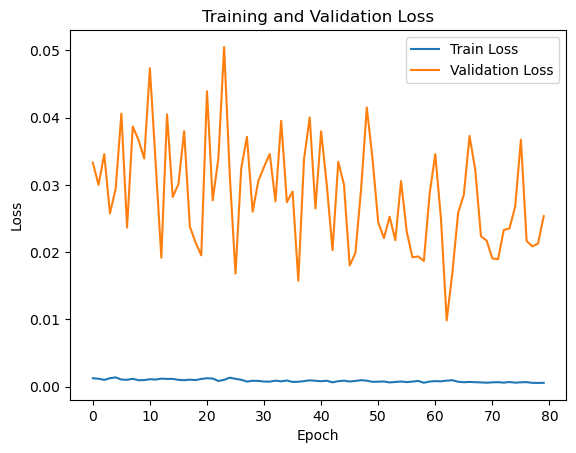

In [30]:
# Plot training and validation loss
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [31]:
# Use the same stock for testing
test_data = stock_data['Close'].values.reshape(-1, 1)
# Split into actual training and testing datasets
train_size = int(len(test_data) * 0.8)
train_data, test_data = test_data[:train_size], test_data[train_size:]


In [32]:
# Scale the testing data using the same scaler fitted on training data
test_data_scaled = sc.transform(test_data)


In [26]:
x_test.shape

(40, 60, 1)

In [33]:
# Prepare test data with timesteps
x_test = []
y_test = test_data[60:]  # Actual stock prices for comparison
for i in range(60, len(test_data_scaled)):
    x_test.append(test_data_scaled[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [34]:
# Predicting the stock prices
y_pred = model.predict(x_test)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [35]:
# Ensure y_pred is a 2D array with shape (num_samples, 1)
if y_pred.ndim == 3:
    y_pred = y_pred[:, -1, :]  # Use the last timestep's prediction


In [36]:
# Inverse transform the predicted prices
predicted_price = sc.inverse_transform(y_pred)


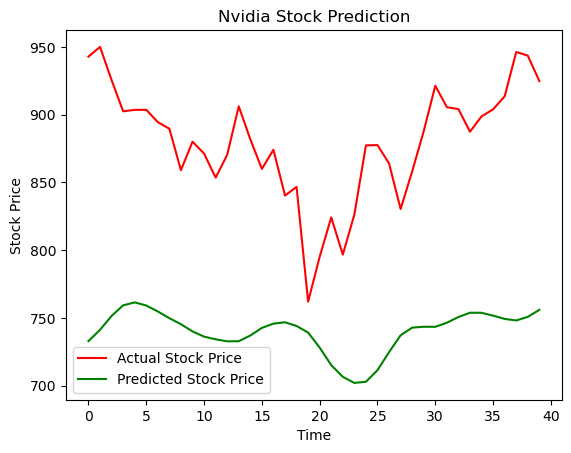

In [37]:
# Plotting the results
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Nvidia Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
